# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [6]:
cities

['atafu village',
 'utrik',
 'remire-montjoly',
 'katabu',
 'grytviken',
 'puerto ayora',
 'mukalla',
 'puerto natales',
 'hawaiian paradise park',
 'edinburgh of the seven seas',
 'badger',
 'lebu',
 'stanley',
 'port-aux-francais',
 'karratha',
 'bethel',
 'callao',
 'la passe',
 'lamar',
 'ocean pointe',
 'westport',
 'lerwick',
 'ulanhot',
 'punta arenas',
 'hays',
 'coquimbo',
 'ilulissat',
 'ushuaia',
 'petropavlovsk-kamchatsky',
 'ust-nera',
 'xiantao',
 'waitangi',
 'naantali',
 'arraial do cabo',
 'palmer',
 'nuuk',
 'kuanda',
 'invercargill',
 'ketchikan',
 'klyuchi',
 'isafjordur',
 'altay',
 'aqsay',
 'puerto deseado',
 'raja',
 'ciudad guayana',
 'blackmans bay',
 'ancud',
 'zilair',
 'anadyr',
 'antalaha',
 'avarua',
 'jamestown',
 'bredasdorp',
 'wailua homesteads',
 'suva',
 'port alfred',
 'saldanha',
 'along',
 'lensk',
 'carnarvon',
 'cidreira',
 'mulanay',
 'yellowknife',
 'akureyri',
 'illizi',
 'margaret river',
 'taiohae',
 'tinaquillo',
 'gaigeturi',
 'adamstown

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | remire-montjoly
Processing Record 4 of Set 1 | katabu
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | mukalla
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | callao
Processing Record 18 of Set 1 | la passe
Processing Record 19 of Set 1 | lamar
Processing Record 20 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 21 of Set 1 | westport
Processing 

Processing Record 42 of Set 4 | solhan
Processing Record 43 of Set 4 | xining
Processing Record 44 of Set 4 | ceerigaabo
Processing Record 45 of Set 4 | nogliki
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | taro
Processing Record 48 of Set 4 | tarawa
Processing Record 49 of Set 4 | batticaloa
Processing Record 0 of Set 5 | ta`u
Processing Record 1 of Set 5 | abaete
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 4 of Set 5 | uturoa
Processing Record 5 of Set 5 | nova sintra
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | petrolina
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | brookings
Processing Record 12 of Set 5 | magadan
Processing Record 13 of Set 5 | nayoro
Processing Record 14 of Set 5 | ad dabbah
Processing Record 15 o

Processing Record 34 of Set 8 | horki
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | djougou
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | urucara
Processing Record 39 of Set 8 | luuq
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | oranjestad
Processing Record 42 of Set 8 | akhtubinsk
Processing Record 43 of Set 8 | port alberni
Processing Record 44 of Set 8 | borogontsy
Processing Record 45 of Set 8 | beloyarskiy
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | pangody
Processing Record 49 of Set 8 | calvinia
Processing Record 0 of Set 9 | mwinilunga
Processing Record 1 of Set 9 | klaksvik
Processing Record 2 of Set 9 | iskateley
Processing Record 3 of Set 9 | pyhajarvi
Processing Record 4 of Set 9 | weno
Processing Record 5 of Set 9 | suncook
Processing Record 6 of Set 9 | cargados carajos
City not found. Skipping...
Processing Record 7 of Set 

Processing Record 23 of Set 12 | valdivia
Processing Record 24 of Set 12 | northam
Processing Record 25 of Set 12 | saint-philippe
Processing Record 26 of Set 12 | staryy oskol
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | namtsy
Processing Record 29 of Set 12 | newman
Processing Record 30 of Set 12 | karachi
Processing Record 31 of Set 12 | manokwari
Processing Record 32 of Set 12 | hualien city
Processing Record 33 of Set 12 | pacocha
Processing Record 34 of Set 12 | jianguang
Processing Record 35 of Set 12 | harsova
Processing Record 36 of Set 12 | mitu
Processing Record 37 of Set 12 | kishangarh
Processing Record 38 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 39 of Set 12 | pingzhuang
Processing Record 40 of Set 12 | hasaki
Processing Record 41 of Set 12 | launceston
Processing Record 42 of Set 12 | zaozersk
Processing Record 43 of Set 12 | al bawiti
Processing Record 44 of Set 12 | dadonghai
City not found. Skipping...
P

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [30]:
# Display sample data
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,83.89,66,22,8.01,TK,1685164640
1,utrik,11.2278,169.8474,81.39,72,100,14.07,MH,1685164640
2,remire-montjoly,4.9167,-52.2667,75.24,94,0,3.44,GF,1685164641
3,katabu,-4.9333,122.5167,81.88,75,92,3.09,ID,1685164641
4,grytviken,-54.2811,-36.5092,37.06,99,100,10.80,GS,1685164641
5,puerto ayora,-0.7393,-90.3518,78.55,95,66,7.00,EC,1685164642
6,mukalla,14.5425,49.1242,85.12,70,14,5.14,YE,1685164642
7,puerto natales,-51.7236,-72.4875,39.65,56,40,25.32,CL,1685164642
8,hawaiian paradise park,19.5933,-154.9731,71.11,94,75,8.05,US,1685164642


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,83.89,66,22,8.01,TK,1685164640
1,utrik,11.2278,169.8474,81.39,72,100,14.07,MH,1685164640
2,remire-montjoly,4.9167,-52.2667,75.24,94,0,3.44,GF,1685164641
3,katabu,-4.9333,122.5167,81.88,75,92,3.09,ID,1685164641
4,grytviken,-54.2811,-36.5092,37.06,99,100,10.80,GS,1685164641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

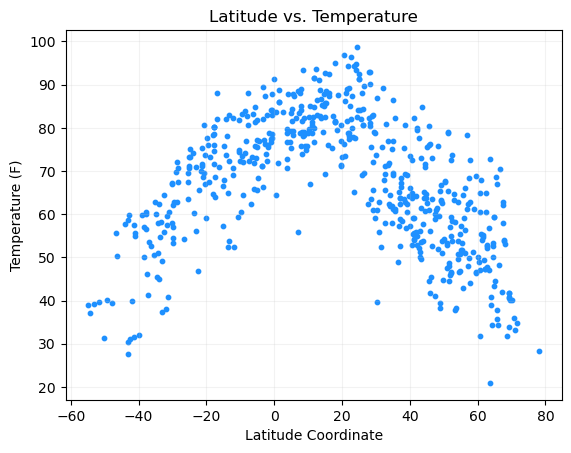

In [63]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Temperature (F)")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

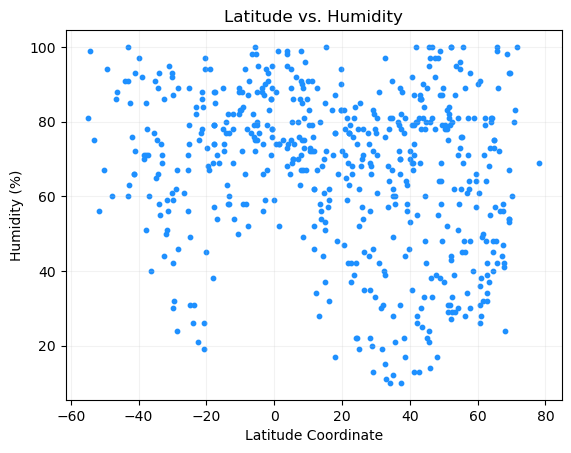

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Humidity (%)")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

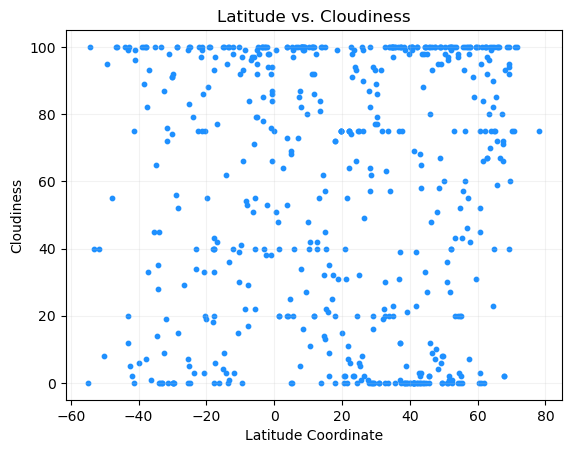

In [65]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Cloudiness")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

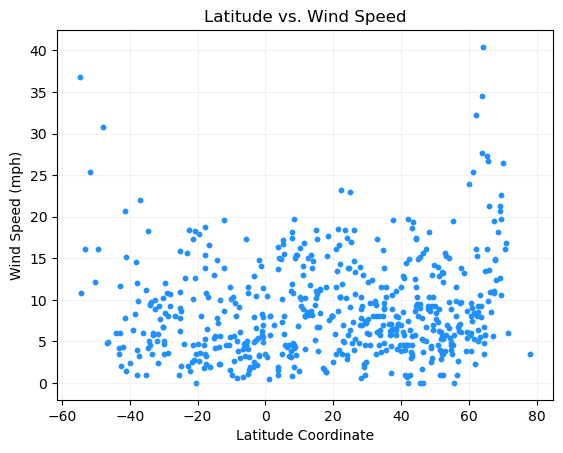

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Wind Speed (mph)")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, color = "dodgerblue", s = 10)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=20,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,81.39,72,100,14.07,MH,1685164640
2,remire-montjoly,4.9167,-52.2667,75.24,94,0,3.44,GF,1685164641
6,mukalla,14.5425,49.1242,85.12,70,14,5.14,YE,1685164642
8,hawaiian paradise park,19.5933,-154.9731,71.11,94,75,8.05,US,1685164642
10,badger,64.8000,-147.5333,59.25,75,100,5.75,US,1685164643


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,83.89,66,22,8.01,TK,1685164640
3,katabu,-4.9333,122.5167,81.88,75,92,3.09,ID,1685164641
4,grytviken,-54.2811,-36.5092,37.06,99,100,10.80,GS,1685164641
5,puerto ayora,-0.7393,-90.3518,78.55,95,66,7.00,EC,1685164642
7,puerto natales,-51.7236,-72.4875,39.65,56,40,25.32,CL,1685164642


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5920476952793858


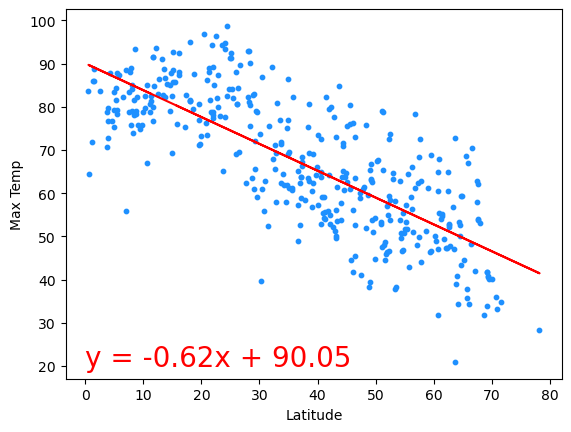

In [98]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,20))

The r-value is: 0.6290216117986608


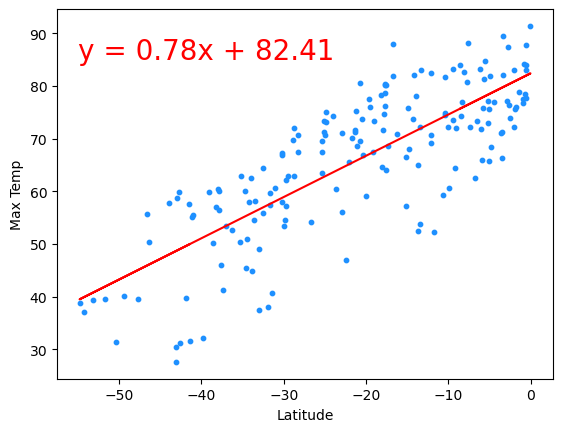

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 85))

**Discussion about the linear relationship:** Given that the range for an r value is between -1 and 1, we know that there is a high positive correlation between the max temperature and the latitude coordinate of a given city. Both regression yielded an approximate r-value of 0.6. So even though the regression lines plotted have opposite slopes (positive vs negative), the correlations are positive. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02156923767787031


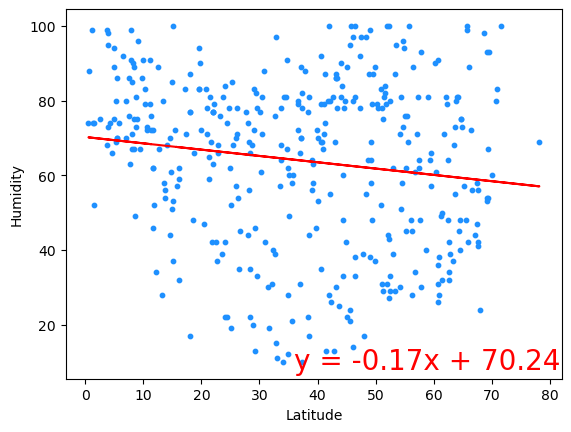

In [118]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(36,8))

The r-value is: 0.017530631331512364


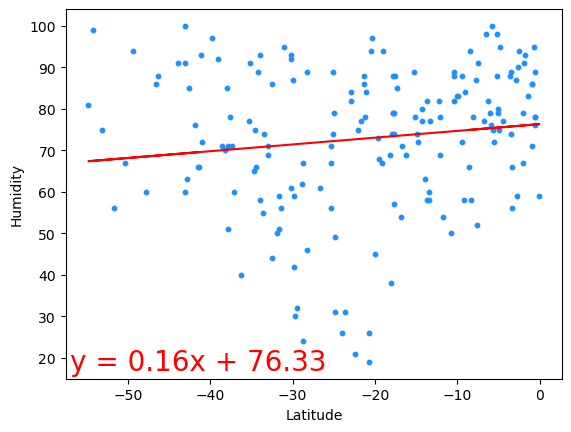

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-57, 17))

**Discussion about the linear relationship:** The correlation between the humidity and latitude for cities is a weak. For the southern and nothern hemispher the r-values are close to zero. This is confirmed in the graph which helps us visualize that there is no trend in the scatter plot, and the plots look to be randomized.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0058249907858259125


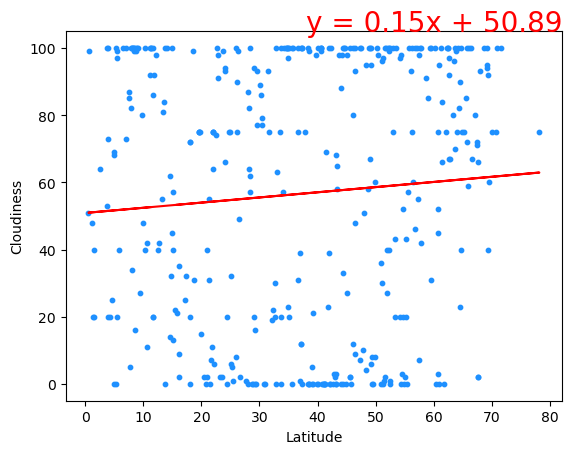

In [139]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (38,105))

The r-value is: 0.03409232733929289


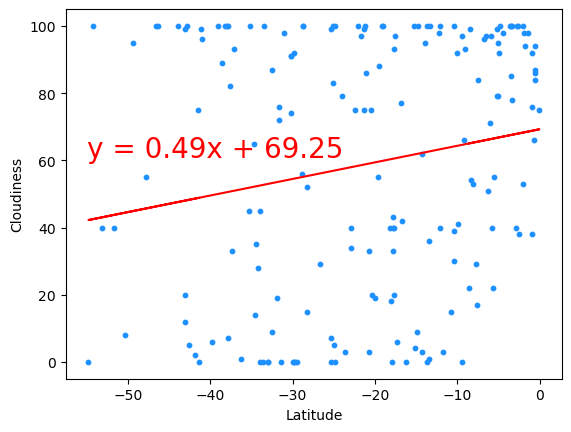

In [144]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,61))

**Discussion about the linear relationship:** The correlation between the cloudiness and latitude for cities is a weak. For the same reasons as we saw in the correlation between humidity and latitued: the southern and nothern hemisphere have r-values that are close to zero. This is confirmed in the graph which helps us visualize that there is no trend in the scatter plot, and the plots look to be randomized.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014745489249206248


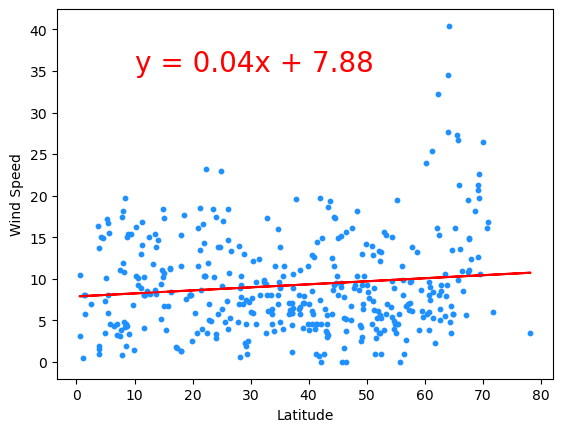

In [146]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,35))

The r-value is: 0.07520477063164871


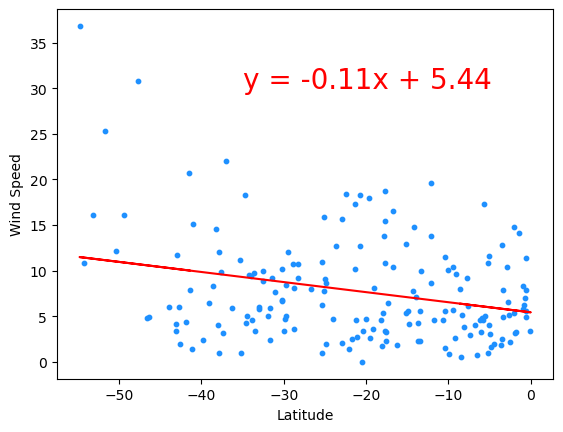

In [149]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-35, 30))

**Discussion about the linear relationship:** The correlation of wind speed to latitude is weak. Like we saw in the regressions using humidity and cloudiness, the low r-values are because of what looks like a randomized plot of data.